# feature matching

Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection).

Then using a distance calculation, finds all the matches in a secondary image.

This means we are no longer rquired to have an exact copy of the target image


The 3 main methods I will work on

1. Brute-force matching with ORB descriptors

2. Brute-force matching with SIFT descriptors and ratio test

3. FLANN based matcher

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [3]:
reeses = cv2.imread("../DATA/reeses_puffs.png",0)

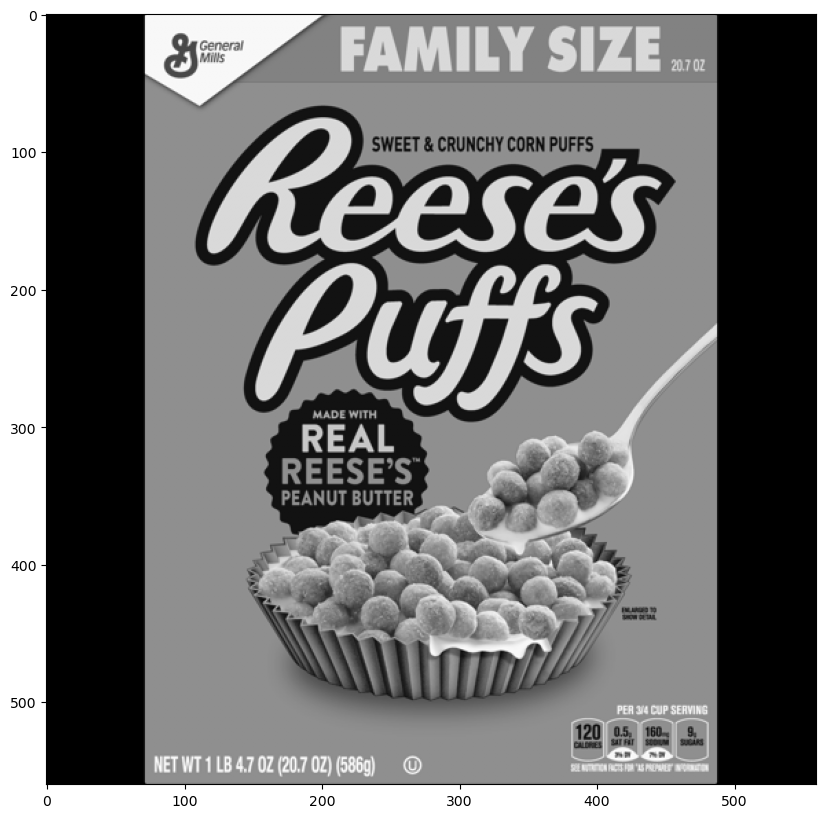

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread("../DATA/many_cereals.jpg",0)

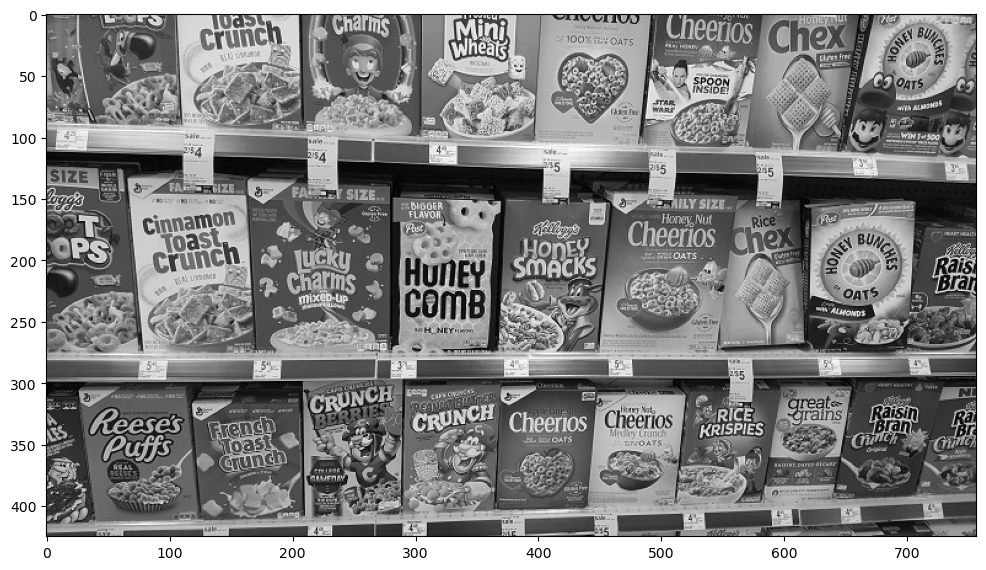

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
matches = sorted(matches, key=lambda x:x.distance)

In [12]:
len(matches)

139

In [13]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

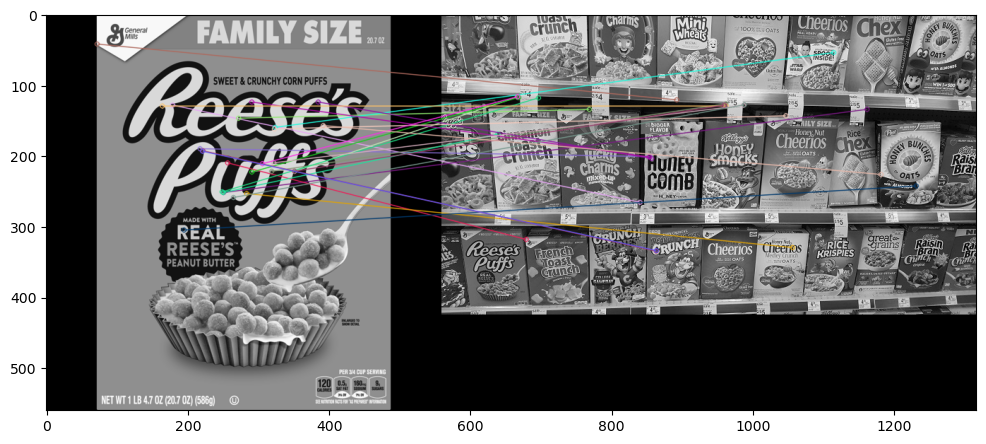

In [15]:
display(reeses_matches)

# Method 2: 

Brute force matching with shift descriptors and ratio test

In [16]:
sift = cv2.xfeatures2d.SIFT_create()

[ WARN:0@773.959] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [17]:
kp1, des1 =sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [18]:
bf = cv2.BFMatcher()

In [19]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]],
      shape=(1501, 128), dtype=float32)

In [20]:
matches = bf.knnMatch(des1, des2, k=2)

In [22]:
#matches

In [23]:
good = []

# less distance == better mach
#ratio match < 75% match 2
for match1, match2 in matches:
    #if match 1 distance is less than 75% of match 2 distance then descriptor was a good match, keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [24]:
len(good)

79

In [25]:
len(matches)

1501

In [26]:
shift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

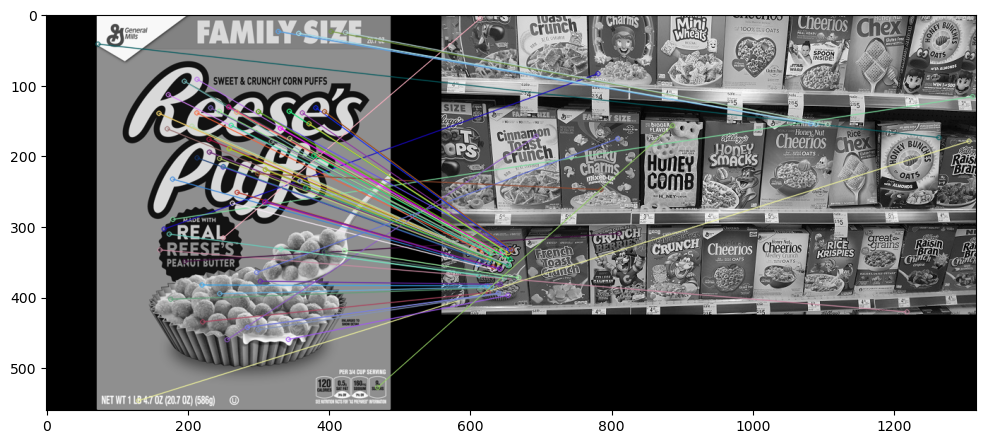

In [27]:
display(shift_matches)

# Method 3:
Flann based matcher

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

In [29]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [30]:
# FLANN fast library for nearest neighobor

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

search_params = dict(checks=50) 

In [31]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [32]:
matches = flann.knnMatch(des1, des2, k=2)

In [33]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

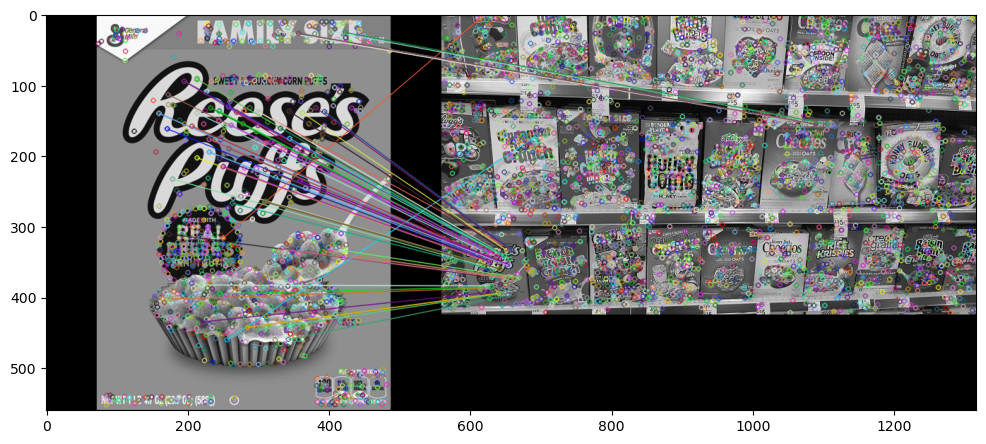

In [34]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)